In [1]:
import nnicli as nc
import json
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [10]:
nc.start_nni(config_file='/mnt/d/Repos/nni/examples/trials/mnist/config.yml')

INFO: expand searchSpacePath: search_space.json to /mnt/d/Repos/nni/examples/trials/mnist/search_space.json
INFO: expand codeDir: . to /mnt/d/Repos/nni/examples/trials/mnist/.
INFO: Starting restful server...
INFO: Successfully started Restful server!
INFO: Setting local config...
INFO: Successfully set local config!
INFO: Starting experiment...
INFO: Successfully started experiment!
-----------------------------------------------------------------------
The experiment id is SVDxgMhp
The Web UI urls are: http://10.0.75.1:8080   http://127.0.0.1:8080   http://192.168.113.241:8080   http://10.172.121.40:8080
-----------------------------------------------------------------------

You can use these commands to get more information about the experiment
-----------------------------------------------------------------------
commands                       description
1. nnictl experiment show        show the information of experiments
2. nnictl trial ls               list all of trial jobs
3

In [11]:
nc.set_endpoint('http://127.0.0.1:8080')

In [12]:
def show_json(res):
    print(json.dumps(res, indent=4))

In [17]:
show_json(nc.get_experiment_status())

{
    "errors": [],
    "status": "DONE"
}


In [18]:
show_json(nc.get_job_statistics())

[
    {
        "trialJobNumber": 10,
        "trialJobStatus": "SUCCEEDED"
    }
]


In [7]:
show_json(nc.get_experiment_profile())

{
    "revision": 5,
    "logDir": "/home/chicm/nni/experiments/ECU8oTpO",
    "params": {
        "authorName": "default",
        "searchSpace": "{\"learning_rate\": {\"_type\": \"choice\", \"_value\": [0.0001, 0.001, 0.01, 0.1]}, \"dropout_rate\": {\"_type\": \"uniform\", \"_value\": [0.5, 0.9]}, \"hidden_size\": {\"_type\": \"choice\", \"_value\": [124, 512, 1024]}, \"conv_size\": {\"_type\": \"choice\", \"_value\": [2, 3, 5, 7]}, \"batch_size\": {\"_type\": \"choice\", \"_value\": [1, 4, 8, 16, 32]}}",
        "maxExecDuration": 3600,
        "maxTrialNum": 10,
        "trainingServicePlatform": "local",
        "experimentName": "example_mnist",
        "versionCheck": true,
        "clusterMetaData": [
            {
                "value": "/mnt/d/Repos/nni/examples/trials/mnist/.",
                "key": "codeDir"
            },
            {
                "value": "python3 mnist.py",
                "key": "command"
            }
        ],
        "tuner": {
            "c

In [19]:
show_json(nc.list_trial_jobs())

[
    {
        "hyperParameters": [
            "{\"parameters\":{\"dropout_rate\":0.593061873774057,\"batch_size\":8,\"conv_size\":3,\"learning_rate\":0.001,\"hidden_size\":124},\"parameter_source\":\"algorithm\",\"parameter_index\":0,\"parameter_id\":0}"
        ],
        "finalMetricData": [
            {
                "data": "0.9657999873161316",
                "trialJobId": "vuOxt",
                "type": "FINAL",
                "sequence": 0,
                "parameterId": "0",
                "timestamp": 1563276575673
            }
        ],
        "endTime": 1563276576450,
        "sequenceId": 0,
        "startTime": 1563276337686,
        "id": "vuOxt",
        "logPath": "file://localhost:/home/chicm/nni/experiments/SVDxgMhp/trials/vuOxt",
        "status": "SUCCEEDED"
    },
    {
        "hyperParameters": [
            "{\"parameters\":{\"dropout_rate\":0.6247350958609632,\"batch_size\":8,\"conv_size\":3,\"learning_rate\":0.01,\"hidden_size\":1024},\"parameter_

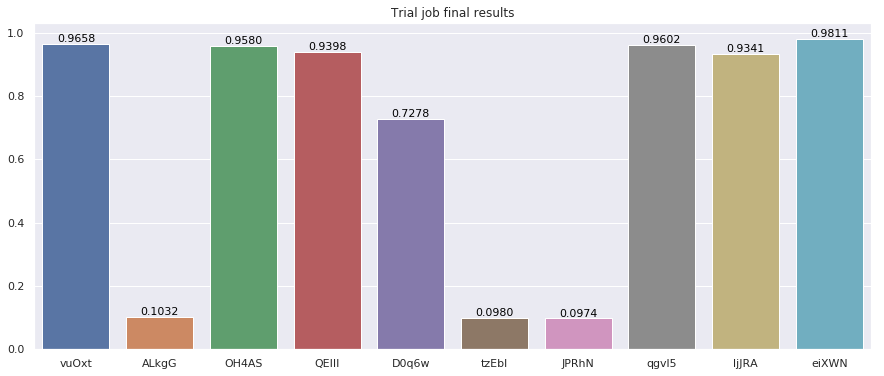

In [20]:
jobs = nc.list_trial_jobs()
job_ids = [x['id'] for x in jobs]
final_metrics = [float(x['finalMetricData'][0]['data']) for x in jobs]
hp = [json.loads(x['hyperParameters'][0])['parameters'] for x in jobs]

data = {'job id': job_ids, 'final metrics': final_metrics}
sns.set(rc={'figure.figsize':(15, 6)})

plt.title('Trial job final results')
ax = sns.barplot(x='job id', y='final metrics', data=data) 

for i,p in enumerate(ax.patches):
    ax.annotate('{:.4f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 5),
                 textcoords='offset points') 

In [21]:
def show_intermediete_results(trial_job_id):
    plt.title('Intermediate results for job ' + trial_job_id)
    sns.set(rc={'figure.figsize':(15, 6)})
    res = nc.get_job_metrics(trial_job_id)
    metrics = [float(x['data']) for x in res if x['type']=='PERIODICAL']
    seq = [int(x['sequence']) for x in res if x['type']=='PERIODICAL']
    sns.barplot(x='sequence', y='intermediate results', data={'sequence': seq, 'intermediate results': metrics})    

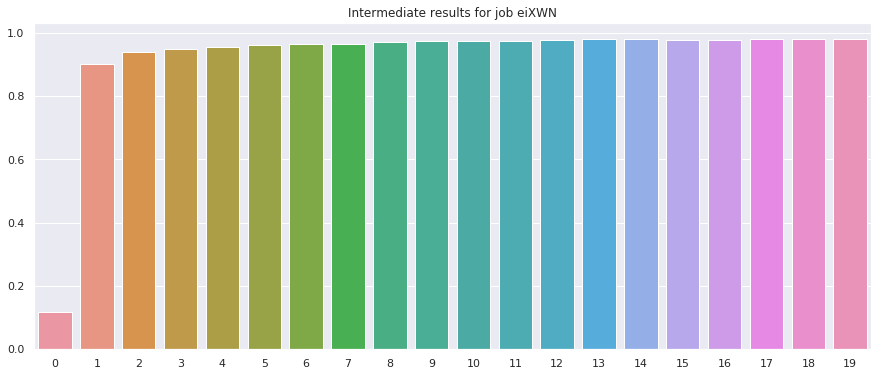

In [23]:
show_intermediete_results('eiXWN')

In [24]:
nc.stop_nni()

INFO: Stoping experiment SVDxgMhp
INFO: Stop experiment success.
